


План проекта:
Загрузка данных и их первичный анализ
Цель: понять структуру данных, выявить основные признаки и целевую переменную.
Предобработка данных
Очистка данных (обработка пропущенных значений, выбросов и т.д.).
Кодирование категориальных переменных.
Масштабирование данных (если необходимо).
Разведочный анализ данных (EDA)
Анализ взаимосвязей признаков с целевой переменной.
Выявление основных факторов, влияющих на успех стартапов.
Разработка модели машинного обучения
Разделение данных на обучающую и тестовую выборки.
Построение и обучение моделей (логистическая регрессия, случайный лес, градиентный бустинг и т.д.).
Оценка качества модели.
Оптимизация модели
Подбор гиперпараметров.
Кросс-валидация.
Формирование рекомендаций
Интерпретация результатов и факторов, влияющих на успешность стартапов.


Начнем с первого шага: загрузка данных и первичный анализ.

Загружу данные и посмотрю их структуру.

Мы успешно загрузили и проанализировали структуру тренировочного набора данных. В наборе данных 13 столбцов и 52516 строк.


Теперь давайте перейдем ко второму шагу — предобработке данных. Мы проведем следующие действия:

Обработаем пропущенные значения.
Преобразуем даты в правильный формат.
Создадим дополнительные признаки, такие как возраст стартапа на момент первого и последнего финансирования.

Начнем с обработки пропусков и преобразования столбцов с датами.

In [19]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Шаг 1. Загрузка данных
train_data = pd.read_csv('/Users/antonserbin/Data/kaggle_startups_train_28062024.csv')
test_data = pd.read_csv('/Users/antonserbin/Data/kaggle_startups_test_28062024.csv')
submission_data = pd.read_csv('/Users/antonserbin/Data/kaggle_startups_sample_submit_28062024.csv')

train_data.head(5)


,name,category_list,funding_total_usd,country_code,state_code,region,city,funding_rounds,first_funding_at,last_funding_at,lifetime
0,Crystalsol,Clean Technology,2819200.0,NIC,17,NaN,NaN,1,2009-07-01,2009-07-01,3501
1,JBI Fish & Wings,Hospitality,NaN,USA,TN,TN - Other,Humboldt,1,2010-07-28,2010-07-28,2717
2,COINPLUS,Finance,428257.0,LUX,3,Esch-sur-alzette,Esch-sur-alzette,2,2014-05-15,2014-09-18,1295
3,Imagine Communications,Software|Video|Video Streaming,34700000.0,USA,CA,San Diego,San Diego,4,2005-01-01,2010-04-20,4748
4,DNA13,Software,4530000.0,CAN,ON,Ottawa,Ottawa,1,2007-05-08,2007-05-08,6209


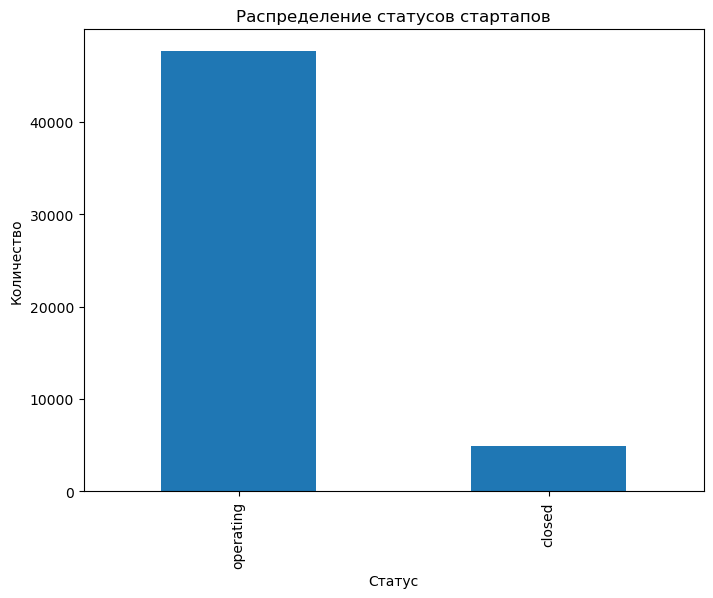

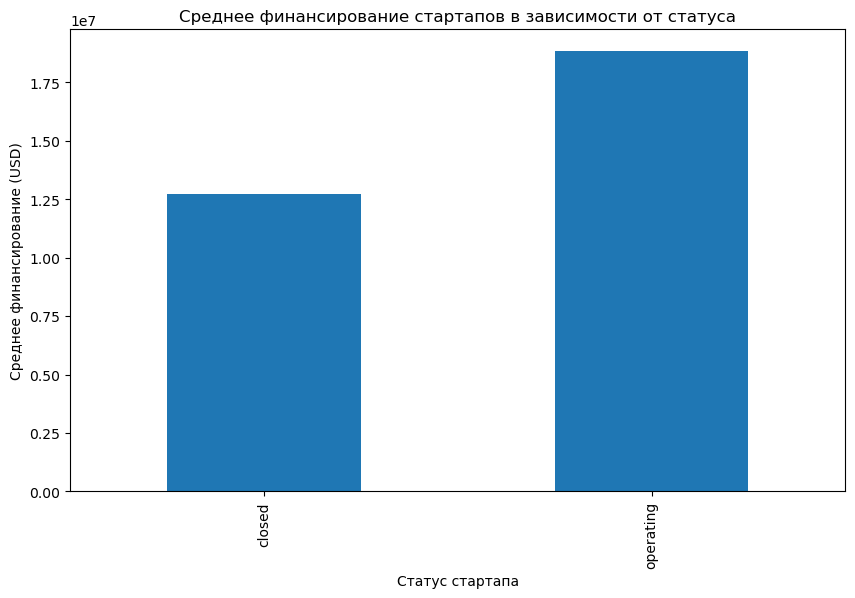

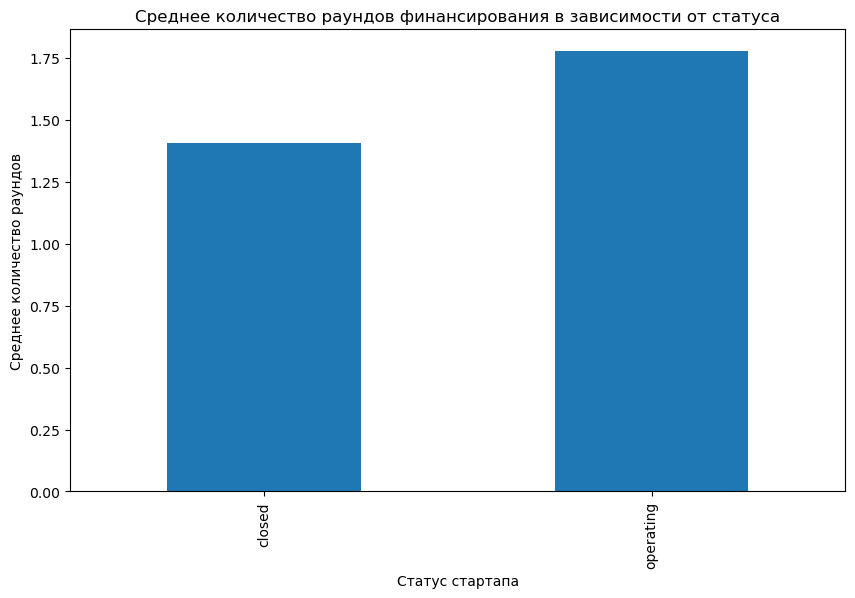

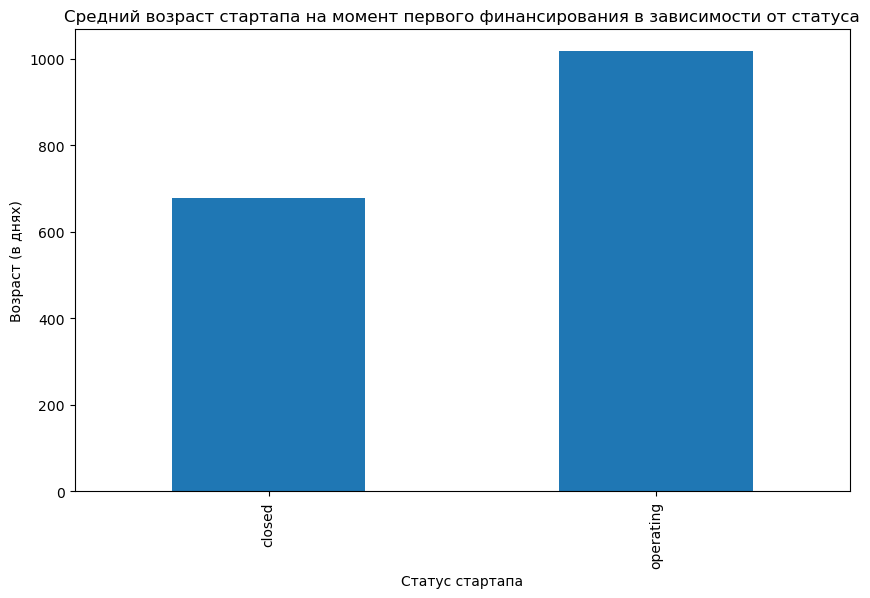

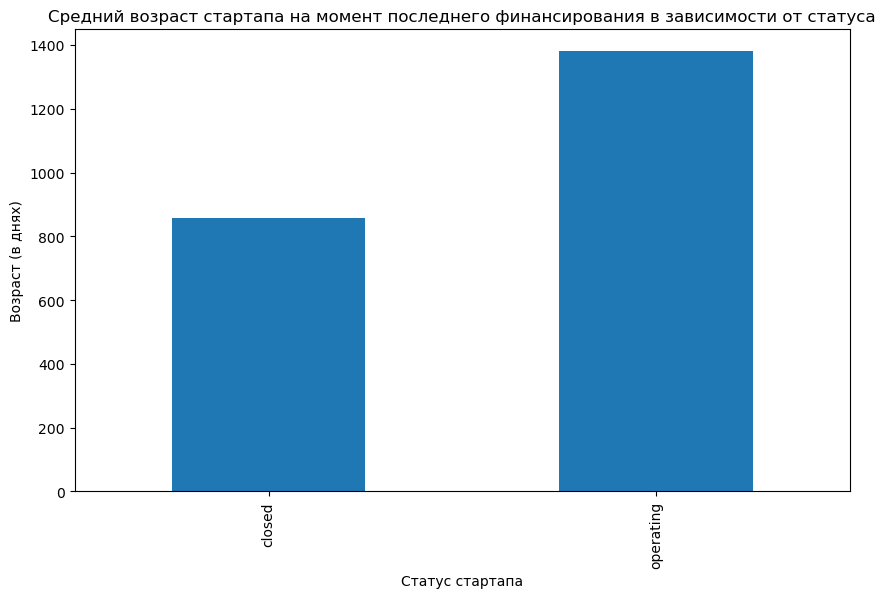

Accuracy: 0.9055537924468423
Classification Report:
              precision    recall  f1-score   support

      closed       0.07      0.00      0.00      1475
   operating       0.91      1.00      0.95     14280

    accuracy                           0.91     15755
   macro avg       0.49      0.50      0.48     15755
weighted avg       0.83      0.91      0.86     15755



/var/folders/rm/krwmtlsx6hs7x1r5vmj8m2w80000gn/T/ipykernel_84601/3654816516.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['category_list'] = le.fit_transform(X['category_list'])


In [21]:
# Шаг 2. Предобработка данных
# Преобразуем столбцы с датами в формат datetime
train_data['founded_at'] = pd.to_datetime(train_data['founded_at'], errors='coerce')
train_data['first_funding_at'] = pd.to_datetime(train_data['first_funding_at'], errors='coerce')
train_data['last_funding_at'] = pd.to_datetime(train_data['last_funding_at'], errors='coerce')
train_data['closed_at'] = pd.to_datetime(train_data['closed_at'], errors='coerce')

# Рассчитаем возраст стартапа на момент первого и последнего финансирования
train_data['age_at_first_funding'] = (train_data['first_funding_at'] - train_data['founded_at']).dt.days
train_data['age_at_last_funding'] = (train_data['last_funding_at'] - train_data['founded_at']).dt.days

# Заполним пропуски в категориальных данных с помощью 'unknown' и в числовых столбцах средними значениями
train_data['category_list'] = train_data['category_list'].fillna('unknown')
train_data['country_code'] = train_data['country_code'].fillna('unknown')
train_data['state_code'] = train_data['state_code'].fillna('unknown')
train_data['region'] = train_data['region'].fillna('unknown')
train_data['city'] = train_data['city'].fillna('unknown')
train_data['funding_total_usd'] = train_data['funding_total_usd'].fillna(train_data['funding_total_usd'].mean())

# Шаг 3. Разведочный анализ данных (EDA)
# Распределение целевой переменной 'status'
status_distribution = train_data['status'].value_counts()
plt.figure(figsize=(8, 6))
status_distribution.plot(kind='bar')
plt.title('Распределение статусов стартапов')
plt.xlabel('Статус')
plt.ylabel('Количество')
plt.show()

# Среднее финансирование в зависимости от статуса
plt.figure(figsize=(10, 6))
train_data.groupby('status')['funding_total_usd'].mean().plot(kind='bar')
plt.title('Среднее финансирование стартапов в зависимости от статуса')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее финансирование (USD)')
plt.show()

# Количество раундов финансирования в зависимости от статуса
plt.figure(figsize=(10, 6))
train_data.groupby('status')['funding_rounds'].mean().plot(kind='bar')
plt.title('Среднее количество раундов финансирования в зависимости от статуса')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.show()

# Возраст стартапа на момент первого финансирования
plt.figure(figsize=(10, 6))
train_data.groupby('status')['age_at_first_funding'].mean().plot(kind='bar')
plt.title('Средний возраст стартапа на момент первого финансирования в зависимости от статуса')
plt.xlabel('Статус стартапа')
plt.ylabel('Возраст (в днях)')
plt.show()

# Возраст стартапа на момент последнего финансирования
plt.figure(figsize=(10, 6))
train_data.groupby('status')['age_at_last_funding'].mean().plot(kind='bar')
plt.title('Средний возраст стартапа на момент последнего финансирования в зависимости от статуса')
plt.xlabel('Статус стартапа')
plt.ylabel('Возраст (в днях)')
plt.show()

# Шаг 4. Подготовка данных для моделирования
# Выбираем основные признаки
X = train_data[['funding_total_usd', 'funding_rounds', 'age_at_first_funding', 'age_at_last_funding', 'category_list']]
y = train_data['status']

# Применим Label Encoding для категориального признака 'category_list'
le = LabelEncoder()
X['category_list'] = le.fit_transform(X['category_list'])

# Преобразуем целевую переменную в числовой формат
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Шаг 5. Обучение модели логистической регрессии
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Шаг 6. Оценка качества модели
y_pred = log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

# Вывод результатов
print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(classification_rep)